In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "grid"])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols(
    "x y t n a b C c r u s A i j k z w"
)
f, g, m = smp.symbols("f g m", cls=smp.Function)

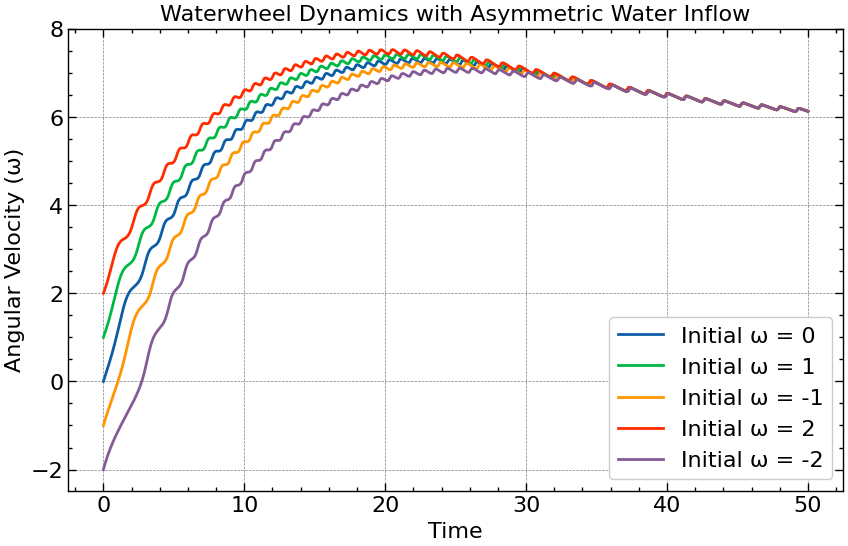

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
gamma = 0.1
Q0 = 1.0
Q1 = 0.5


# Differential equation
def waterwheel(omega, t, gamma, Q0, Q1):
    theta = omega * t  # Assuming theta is proportional to omega * time
    domega_dt = -gamma * omega + Q0 + Q1 * np.sin(theta)
    return domega_dt


# Time points
t = np.linspace(0, 50, 500)

# Solve for different initial conditions
omegas = []
initial_conditions = [0, 1, -1, 2, -2]
for omega0 in initial_conditions:
    omega = odeint(waterwheel, omega0, t, args=(gamma, Q0, Q1))
    omegas.append(omega)

# Plotting
plt.figure(figsize=(10, 6))
for omega, omega0 in zip(omegas, initial_conditions):
    plt.plot(t, omega, label=f"Initial ω = {omega0}")
plt.xlabel("Time")
plt.ylabel("Angular Velocity (ω)")
plt.title("Waterwheel Dynamics with Asymmetric Water Inflow")
plt.legend()
plt.show()